In [2]:
import pandas as pd

import calendar
import datetime

## Import data

In [3]:
data = pd.read_csv('TANKTemp060_098.csv',sep=",", header=None, names=["date", "value"])
data

,date,value
0,2015-060-00:00:30.114,18.744939
1,2015-060-00:00:30.882,18.744900
2,2015-060-00:02:38.114,18.785425
3,2015-060-00:02:38.882,18.785400
4,2015-060-00:04:46.114,18.785425
...,...,...
32117,2015-098-02:25:34.114,18.502024
32118,2015-098-02:27:42.114,18.502024
32119,2015-098-02:29:50.110,18.542510
32120,2015-098-02:31:58.114,18.542510


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32122 entries, 0 to 32121
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    32122 non-null  object 
 1   value   32119 non-null  float64
dtypes: float64(1), object(1)
memory usage: 502.0+ KB


In [9]:

is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]

rows_with_NaN

,date,value
1571,2015-061-13:54:54.882,NaN
3794,2015-064-01:51:42.875,NaN
25868,2015-090-03:26:38.882,NaN


In [5]:
data.describe()

,value
count,32119.000000
mean,19.852985
std,1.293697
min,18.137652
25%,18.947368
50%,19.716599
75%,20.752688
max,110.000000


## Prepare data

In [3]:
data.dropna(inplace=True)
# data.reindex(data)



data.reset_index(drop=True, inplace = True)
data.head(1572)

,date,value
0,2015-060-00:00:30.114,18.744939
1,2015-060-00:00:30.882,18.744900
2,2015-060-00:02:38.114,18.785425
3,2015-060-00:02:38.882,18.785400
4,2015-060-00:04:46.114,18.785425
...,...,...
1567,2015-061-13:50:22.110,20.698925
1568,2015-061-13:50:22.877,20.698900
1569,2015-061-13:52:30.114,20.698925
1570,2015-061-13:54:38.114,20.698925


In [4]:
data['StandardTime']=0
data.head(1572)

,date,value,StandardTime
0,2015-060-00:00:30.114,18.744939,0
1,2015-060-00:00:30.882,18.744900,0
2,2015-060-00:02:38.114,18.785425,0
3,2015-060-00:02:38.882,18.785400,0
4,2015-060-00:04:46.114,18.785425,0
...,...,...,...
1567,2015-061-13:50:22.110,20.698925,0
1568,2015-061-13:50:22.877,20.698900,0
1569,2015-061-13:52:30.114,20.698925,0
1570,2015-061-13:54:38.114,20.698925,0


In [5]:
data

,date,value,StandardTime
0,2015-060-00:00:30.114,18.744939,0
1,2015-060-00:00:30.882,18.744900,0
2,2015-060-00:02:38.114,18.785425,0
3,2015-060-00:02:38.882,18.785400,0
4,2015-060-00:04:46.114,18.785425,0
...,...,...,...
32114,2015-098-02:25:34.114,18.502024,0
32115,2015-098-02:27:42.114,18.502024,0
32116,2015-098-02:29:50.110,18.542510,0
32117,2015-098-02:31:58.114,18.542510,0


In [6]:
for i in range(len(data)):
    dd=data['date'][i].split('-')
    yy=int(dd[0])
    jd=int(dd[1])
    sec=dd[2].split(':')
    ss=sec[2][:-4]
    mm=sec[2][-3:]
    month = 1
    day = 0
    while jd - calendar.monthrange(yy,month)[1] > 0 and month <= 12:
        jd = jd - calendar.monthrange(yy,month)[1]
        month = month + 1

    data['StandardTime'][i]=datetime.datetime(yy, month, jd, int(sec[0]),int(sec[1]),int(ss),int(mm)*1000)

data.head()

D:\Anaconda3\envs\arima\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,value,StandardTime
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114000
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882000
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114000


In [7]:
data['epoch']=0
data.head()

,date,value,StandardTime,epoch
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000,0
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000,0
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114000,0
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882000,0
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114000,0


In [8]:
from datetime import datetime
import time

for i_m in range(len(data)):
    # convert utc -> epoch(sec)
    dd = time.mktime(data['StandardTime'][i_m].timetuple())
    ms = int(int(str(data['StandardTime'][i_m]).split('.')[1])/1000)
    # build epoch (millisec) by add microsec from utc to epoch(sec)
    ep_mil = int(str(int(dd))+str(ms))
    # add epoch (milsec) -> epoch column
    data['epoch'][i_m] = ep_mil

D:\Anaconda3\envs\arima\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [9]:
data

,date,value,StandardTime,epoch
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000,1425142830114
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000,1425142830882
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114000,1425142958114
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882000,1425142958882
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114000,1425143086114
...,...,...,...,...
32114,2015-098-02:25:34.114,18.502024,2015-04-08 02:25:34.114000,1428434734114
32115,2015-098-02:27:42.114,18.502024,2015-04-08 02:27:42.114000,1428434862114
32116,2015-098-02:29:50.110,18.542510,2015-04-08 02:29:50.110000,1428434990110
32117,2015-098-02:31:58.114,18.542510,2015-04-08 02:31:58.114000,1428435118114


In [10]:
type(data['StandardTime'][0])

datetime.datetime

### Create date range

In [11]:
import pandas as pd
from datetime import datetime
import numpy as np

In [12]:
date_rng = pd.bdate_range(start=str(data['StandardTime'][0]), end=str(data['StandardTime'][len(data)]), freq='H')

KeyError: 32119

In [149]:
# t0 = '2018-01-01 00:00:00.000'
# t1 = '2018-01-02 00:00:00.000'

t0, t1 = str(data['StandardTime'][0]), str(data['StandardTime'][len(data)-1])

## generate the sequence with a step of 100 milliseconds
# df_times = pd.date_range(t0, t1, freq = '0.5H', tz= "UTC")
df_times = pd.date_range(t0, t1, freq = '0.2H')

In [150]:
# type(df_times[0])
df_times

DatetimeIndex(['2015-03-01 00:00:30.114000', '2015-03-01 00:12:30.114000',
               '2015-03-01 00:24:30.114000', '2015-03-01 00:36:30.114000',
               '2015-03-01 00:48:30.114000', '2015-03-01 01:00:30.114000',
               '2015-03-01 01:12:30.114000', '2015-03-01 01:24:30.114000',
               '2015-03-01 01:36:30.114000', '2015-03-01 01:48:30.114000',
               ...
               '2015-04-08 00:36:30.114000', '2015-04-08 00:48:30.114000',
               '2015-04-08 01:00:30.114000', '2015-04-08 01:12:30.114000',
               '2015-04-08 01:24:30.114000', '2015-04-08 01:36:30.114000',
               '2015-04-08 01:48:30.114000', '2015-04-08 02:00:30.114000',
               '2015-04-08 02:12:30.114000', '2015-04-08 02:24:30.114000'],
              dtype='datetime64[ns]', length=4573, freq='12T')

In [ ]:
import pandas as pd
pd.to_datetime(1490195805, unit='s')
# Timestamp('2017-03-22 15:16:45')
 pd.to_datetime(1490195805433502912, unit='ns')
# Timestamp('2017-03-22 15:16:45.433502912')

In [ ]:
per1 = pd.date_range(start ='1-1-2018',  
         end ='1-05-2018', freq ='5H') 

In [ ]:
per1

In [ ]:
data

In [43]:
data_sp, d = [], []

In [44]:
data_sp = data.copy()

In [35]:
data_sp['year'] = [d.year for d in data_sp.StandardTime]
data_sp['month'] = [d.strftime('%b') for d in data_sp.StandardTime]
data_sp['day'] = [d.strftime('%d') for b in data_sp.StandardTime]
years = data_sp['year'].unique()

AttributeError: 'list' object has no attribute 'strftime'

In [20]:
data_sp

,date,value,StandardTime,epoch,year,month
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000,1425142830114,2015,Mar
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000,1425142830882,2015,Mar
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114000,1425142958114,2015,Mar
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882000,1425142958882,2015,Mar
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114000,1425143086114,2015,Mar
...,...,...,...,...,...,...
32114,2015-098-02:25:34.114,18.502024,2015-04-08 02:25:34.114000,1428434734114,2015,Apr
32115,2015-098-02:27:42.114,18.502024,2015-04-08 02:27:42.114000,1428434862114,2015,Apr
32116,2015-098-02:29:50.110,18.542510,2015-04-08 02:29:50.110000,1428434990110,2015,Apr
32117,2015-098-02:31:58.114,18.542510,2015-04-08 02:31:58.114000,1428435118114,2015,Apr


In [22]:
from datetime import time

a = time(11, 34, 56)

In [27]:
t = data['StandardTime'][0]
t

datetime.datetime(2015, 3, 1, 0, 0, 30, 114000)

In [29]:
t.second

30

In [47]:

data_sp, d = [], []
data_sp = data.copy()

data_sp['day'] = [d.day for d in data_sp.StandardTime]
data_sp['month'] = [d.month for d in data_sp.StandardTime]
data_sp['year'] = [d.year for d in data_sp.StandardTime]

In [48]:
data_sp.head(10000)

,date,value,StandardTime,epoch,day,month,year
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000,1425142830114,1,3,2015
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000,1425142830882,1,3,2015
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114000,1425142958114,1,3,2015
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882000,1425142958882,1,3,2015
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114000,1425143086114,1,3,2015
...,...,...,...,...,...,...,...
9995,2015-073-02:49:02.114,18.461538,2015-03-14 02:49:02.114000,1426276142114,14,3,2015
9996,2015-073-02:51:10.114,18.461538,2015-03-14 02:51:10.114000,1426276270114,14,3,2015
9997,2015-073-02:53:18.114,18.461538,2015-03-14 02:53:18.114000,1426276398114,14,3,2015
9998,2015-073-02:55:26.114,18.461538,2015-03-14 02:55:26.114000,1426276526114,14,3,2015


In [69]:
data_sp['day']==2

0        False
1        False
2        False
3        False
4        False
         ...  
32114    False
32115    False
32116    False
32117    False
32118    False
Name: day, Length: 32119, dtype: bool

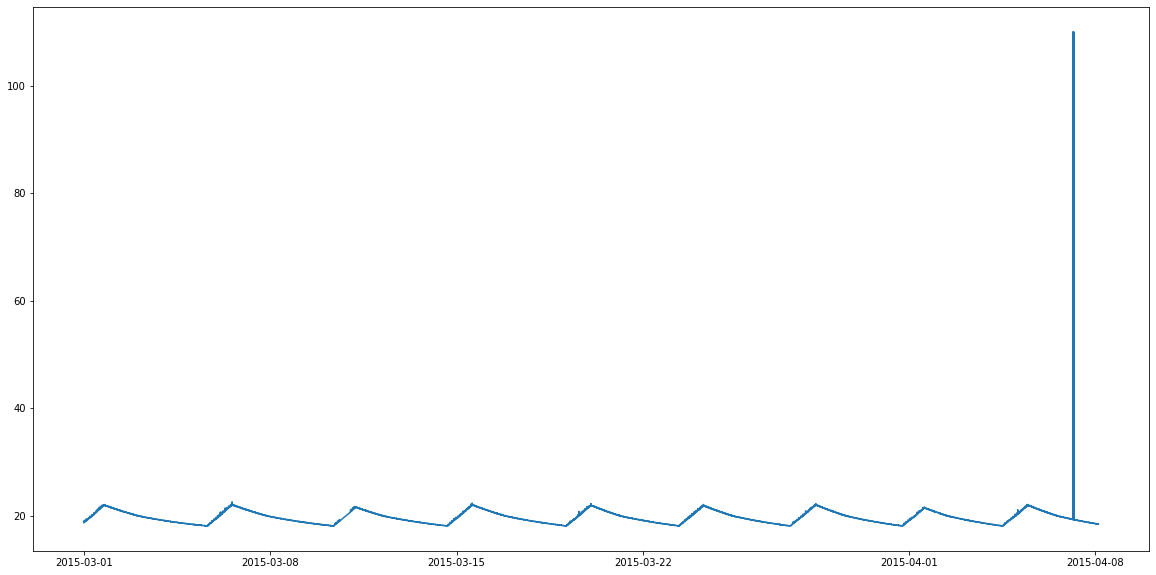

In [123]:
plt.figure(figsize=(20,10))
plt.plot(data['StandardTime'],data['value'])

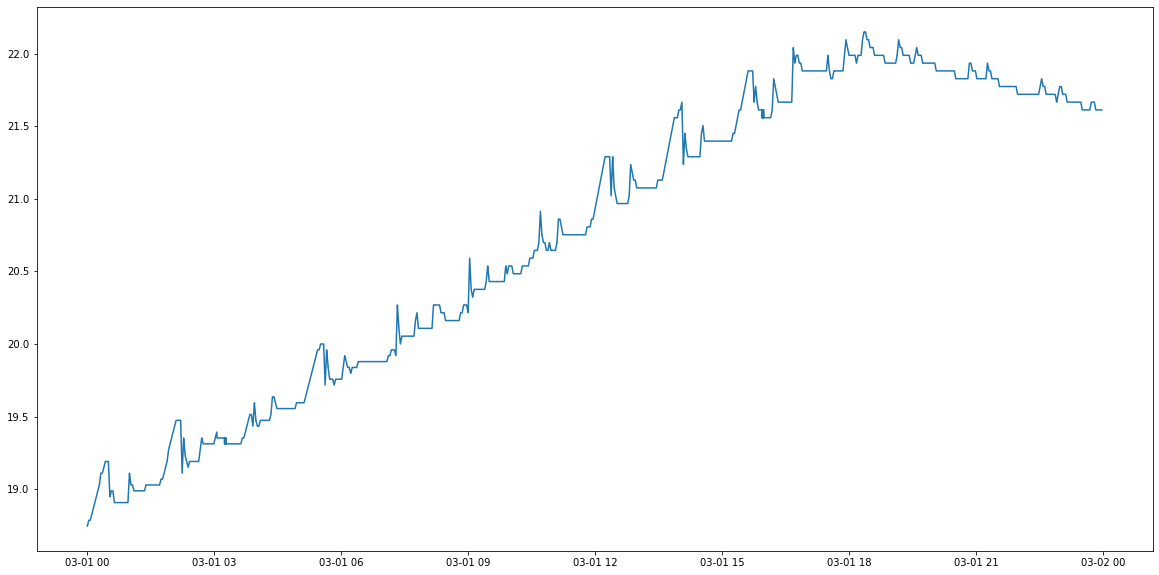

In [207]:
data_d1_m3 = data_sp.loc[(data_sp['day']==1) & (data_sp['month']==3)]
# data_d1_m3
plt.figure(figsize=(20,10))
plt.plot(data_d1_m3['StandardTime'],data_d1_m3['value'])

In [208]:
data_d1_m3

,date,value,StandardTime,epoch,day,month,year
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000,1425142830114,1,3,2015
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000,1425142830882,1,3,2015
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114000,1425142958114,1,3,2015
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882000,1425142958882,1,3,2015
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114000,1425143086114,1,3,2015
...,...,...,...,...,...,...,...
1030,2015-060-23:49:50.875,21.612900,2015-03-01 23:49:50.875000,1425228590875,1,3,2015
1031,2015-060-23:51:58.106,21.612903,2015-03-01 23:51:58.106000,1425228718106,1,3,2015
1032,2015-060-23:54:06.106,21.612903,2015-03-01 23:54:06.106000,1425228846106,1,3,2015
1033,2015-060-23:56:14.110,21.612903,2015-03-01 23:56:14.110000,1425228974110,1,3,2015


In [245]:
from datetime import timedelta  
d0, d1 = data_d1_m3['StandardTime'][0] + timedelta(seconds=60), data_d1_m3['StandardTime'][len(data_d1_m3)-1]

dtimes = pd.date_range(d0, d1, freq = '.005H')
print(dtimes)
print(type(dtimes))

DatetimeIndex(['2015-03-01 00:01:30.114000', '2015-03-01 00:01:48.114000',
               '2015-03-01 00:02:06.114000', '2015-03-01 00:02:24.114000',
               '2015-03-01 00:02:42.114000', '2015-03-01 00:03:00.114000',
               '2015-03-01 00:03:18.114000', '2015-03-01 00:03:36.114000',
               '2015-03-01 00:03:54.114000', '2015-03-01 00:04:12.114000',
               ...
               '2015-03-01 23:55:30.114000', '2015-03-01 23:55:48.114000',
               '2015-03-01 23:56:06.114000', '2015-03-01 23:56:24.114000',
               '2015-03-01 23:56:42.114000', '2015-03-01 23:57:00.114000',
               '2015-03-01 23:57:18.114000', '2015-03-01 23:57:36.114000',
               '2015-03-01 23:57:54.114000', '2015-03-01 23:58:12.114000'],
              dtype='datetime64[ns]', length=4790, freq='18S')
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [246]:
df1 = pd.DataFrame({'StandardTime':dtimes})
df1

,StandardTime
0,2015-03-01 00:01:30.114
1,2015-03-01 00:01:48.114
2,2015-03-01 00:02:06.114
3,2015-03-01 00:02:24.114
4,2015-03-01 00:02:42.114
...,...
4785,2015-03-01 23:57:00.114
4786,2015-03-01 23:57:18.114
4787,2015-03-01 23:57:36.114
4788,2015-03-01 23:57:54.114


In [247]:
df2 = data_d1_m3.append(df1, ignore_index=True)
df2

,date,value,StandardTime,epoch,day,month,year
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000,1.425143e+12,1.0,3.0,2015.0
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000,1.425143e+12,1.0,3.0,2015.0
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114000,1.425143e+12,1.0,3.0,2015.0
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882000,1.425143e+12,1.0,3.0,2015.0
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114000,1.425143e+12,1.0,3.0,2015.0
...,...,...,...,...,...,...,...
5820,NaN,NaN,2015-03-01 23:57:00.114000,NaN,NaN,NaN,NaN
5821,NaN,NaN,2015-03-01 23:57:18.114000,NaN,NaN,NaN,NaN
5822,NaN,NaN,2015-03-01 23:57:36.114000,NaN,NaN,NaN,NaN
5823,NaN,NaN,2015-03-01 23:57:54.114000,NaN,NaN,NaN,NaN


In [248]:
df3=df2.sort_values(by='StandardTime')
df3 = df3.reset_index(drop=True)
df3

,date,value,StandardTime,epoch,day,month,year
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000,1.425143e+12,1.0,3.0,2015.0
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000,1.425143e+12,1.0,3.0,2015.0
2,NaN,NaN,2015-03-01 00:01:30.114000,NaN,NaN,NaN,NaN
3,NaN,NaN,2015-03-01 00:01:48.114000,NaN,NaN,NaN,NaN
4,NaN,NaN,2015-03-01 00:02:06.114000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5820,NaN,NaN,2015-03-01 23:57:18.114000,NaN,NaN,NaN,NaN
5821,NaN,NaN,2015-03-01 23:57:36.114000,NaN,NaN,NaN,NaN
5822,NaN,NaN,2015-03-01 23:57:54.114000,NaN,NaN,NaN,NaN
5823,NaN,NaN,2015-03-01 23:58:12.114000,NaN,NaN,NaN,NaN


In [249]:
df4=df3['value'].interpolate(method='polynomial', order=1)
df4

0       18.744939
1       18.744900
2       18.753005
3       18.761110
4       18.769215
          ...    
5820    21.612903
5821    21.612903
5822    21.612903
5823    21.612903
5824    21.612903
Name: value, Length: 5825, dtype: float64

In [250]:
df5=df1
df5['value']=df4
df5

,StandardTime,value
0,2015-03-01 00:01:30.114,18.744939
1,2015-03-01 00:01:48.114,18.744900
2,2015-03-01 00:02:06.114,18.753005
3,2015-03-01 00:02:24.114,18.761110
4,2015-03-01 00:02:42.114,18.769215
...,...,...
4785,2015-03-01 23:57:00.114,22.036281
4786,2015-03-01 23:57:18.114,22.029562
4787,2015-03-01 23:57:36.114,22.022843
4788,2015-03-01 23:57:54.114,22.016123


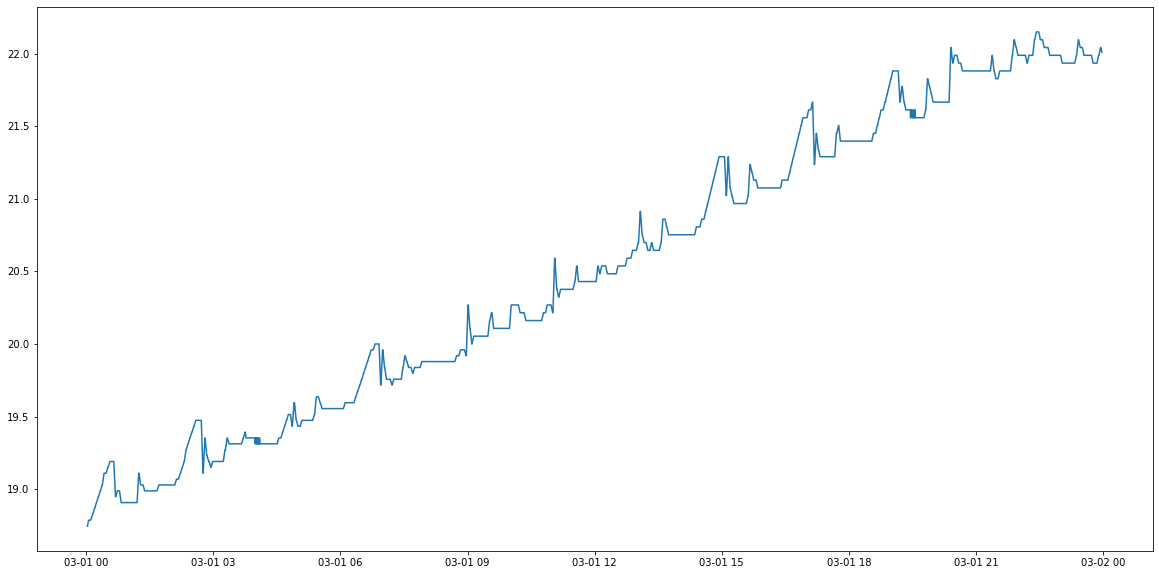

In [251]:
plt.figure(figsize=(20,10))
plt.plot(df5['StandardTime'],df5['value'])

In [ ]:
data_d1_m3 = data_sp.loc[(data_sp['day']==1) & (data_sp['month']==3)]
# data_d1_m3
plt.figure(figsize=(20,10))
plt.plot(data_d1_m3['StandardTime'],data_d1_m3['value'])

In [ ]:
df_ffill = df.ffill()

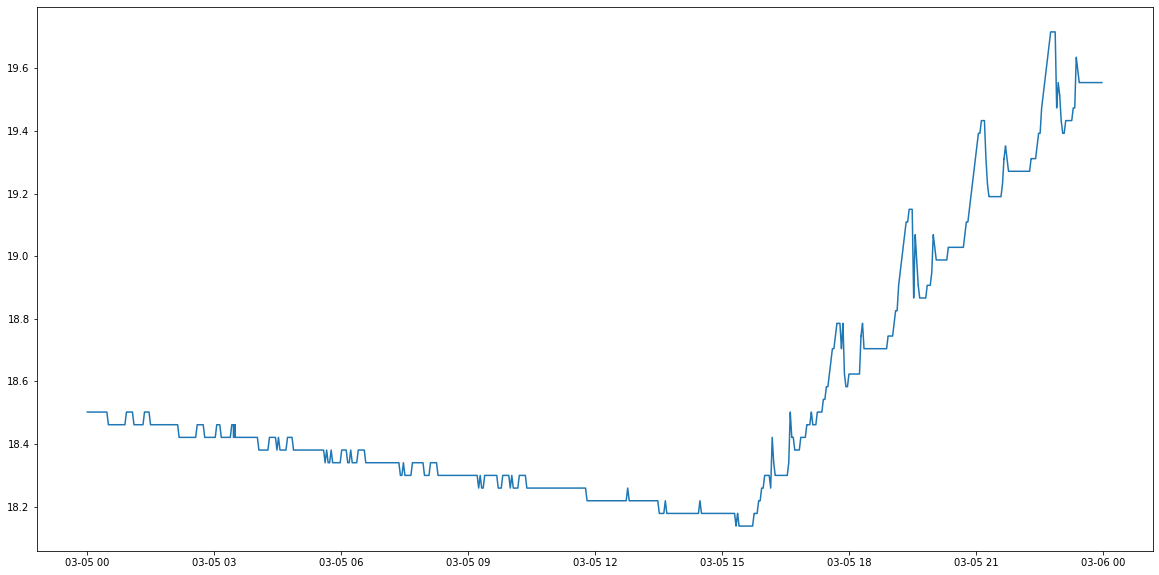

In [132]:
data_d1_m3 = data_sp.loc[(data_sp['day']==5) & (data_sp['month']==3)]
# data_d1_m3
plt.figure(figsize=(20,10))
plt.plot(data_d1_m3['StandardTime'],data_d1_m3['value'])

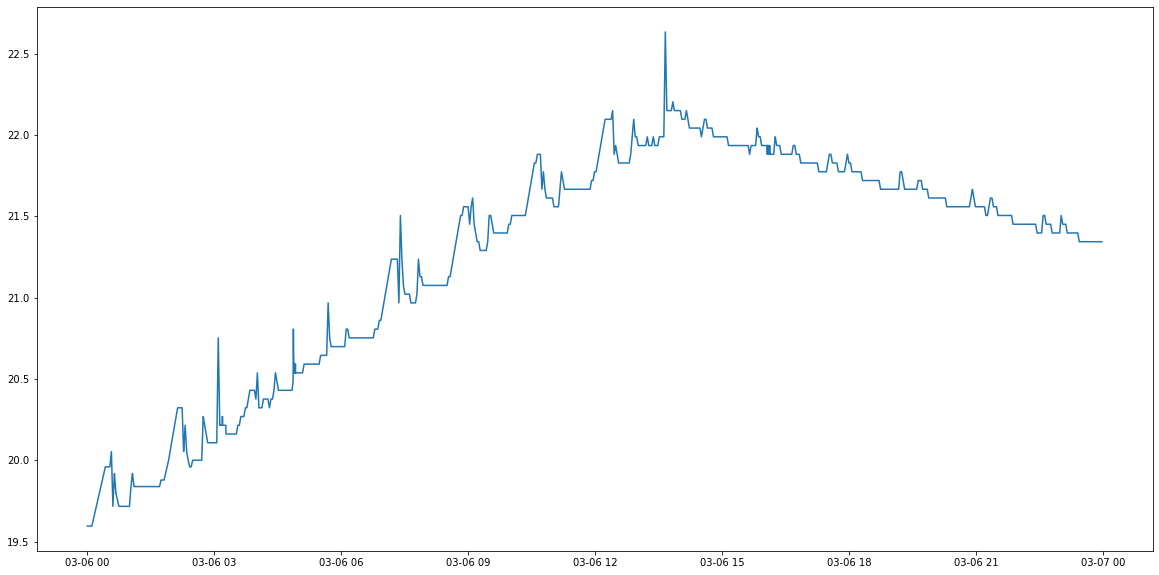

In [136]:
data_d1_m3 = data_sp.loc[(data_sp['day']==6) & (data_sp['month']==3)]
# data_d1_m3
plt.figure(figsize=(20,10))
plt.plot(data_d1_m3['StandardTime'],data_d1_m3['value'])

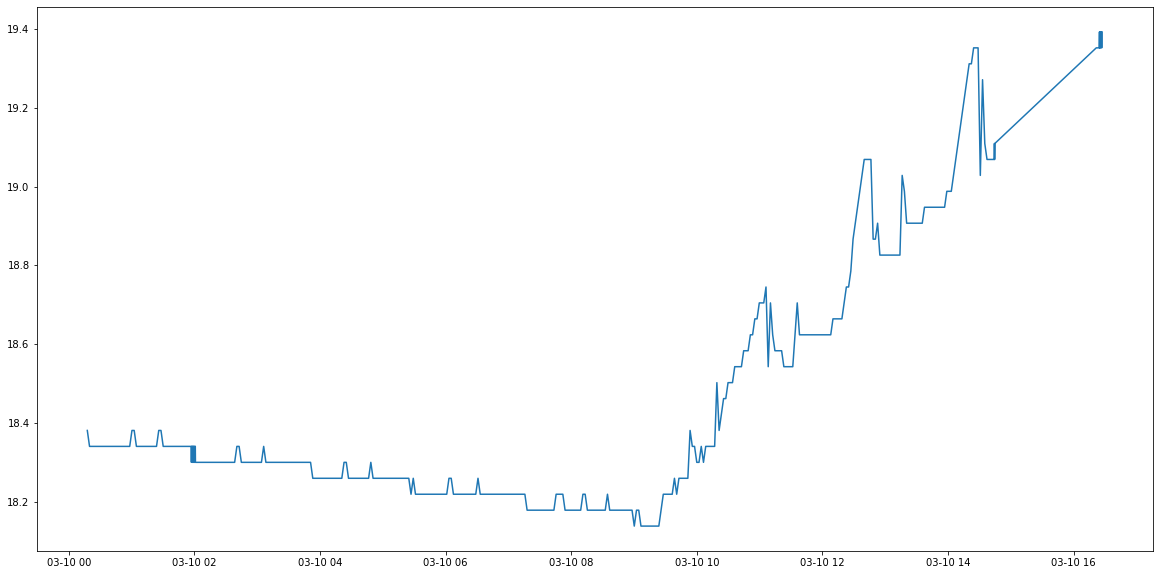

In [137]:
data_d1_m3 = data_sp.loc[(data_sp['day']==10) & (data_sp['month']==3)]
# data_d1_m3
plt.figure(figsize=(20,10))
plt.plot(data_d1_m3['StandardTime'],data_d1_m3['value'])

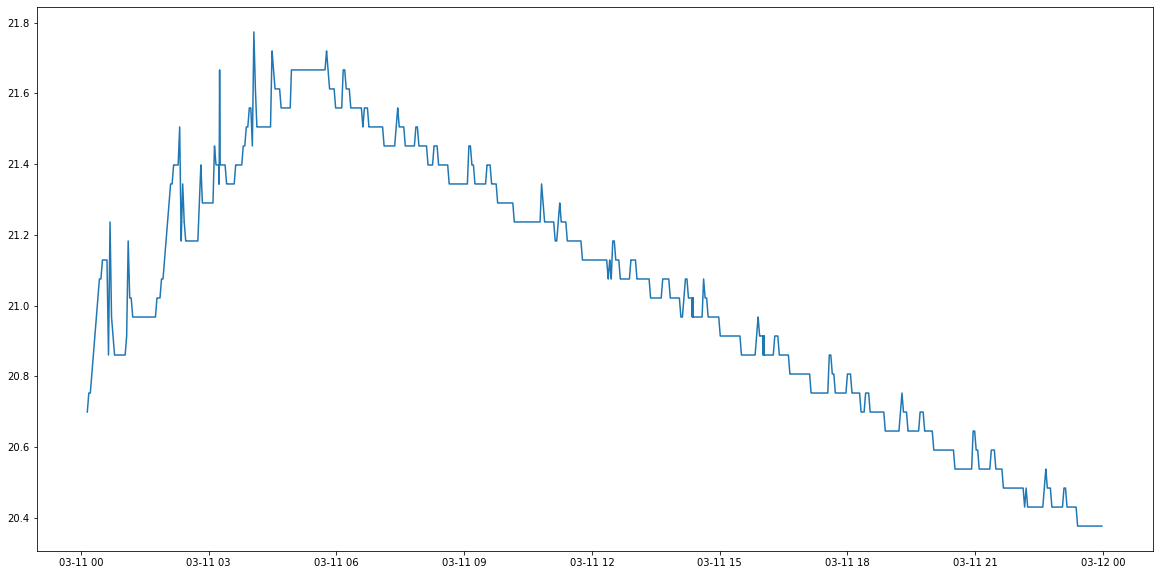

In [138]:
data_d1_m3 = data_sp.loc[(data_sp['day']==11) & (data_sp['month']==3)]
# data_d1_m3
plt.figure(figsize=(20,10))
plt.plot(data_d1_m3['StandardTime'],data_d1_m3['value'])

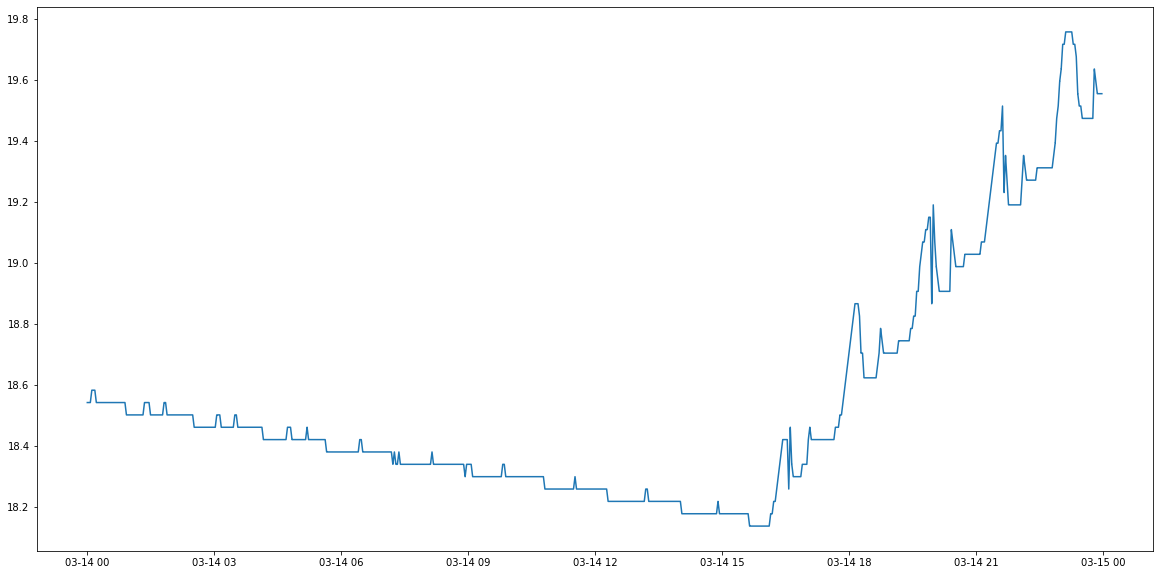

In [144]:
data_d1_m3 = data_sp.loc[(data_sp['day']==14) & (data_sp['month']==3)]
# data_d1_m3
plt.figure(figsize=(20,10))
plt.plot(data_d1_m3['StandardTime'],data_d1_m3['value'])

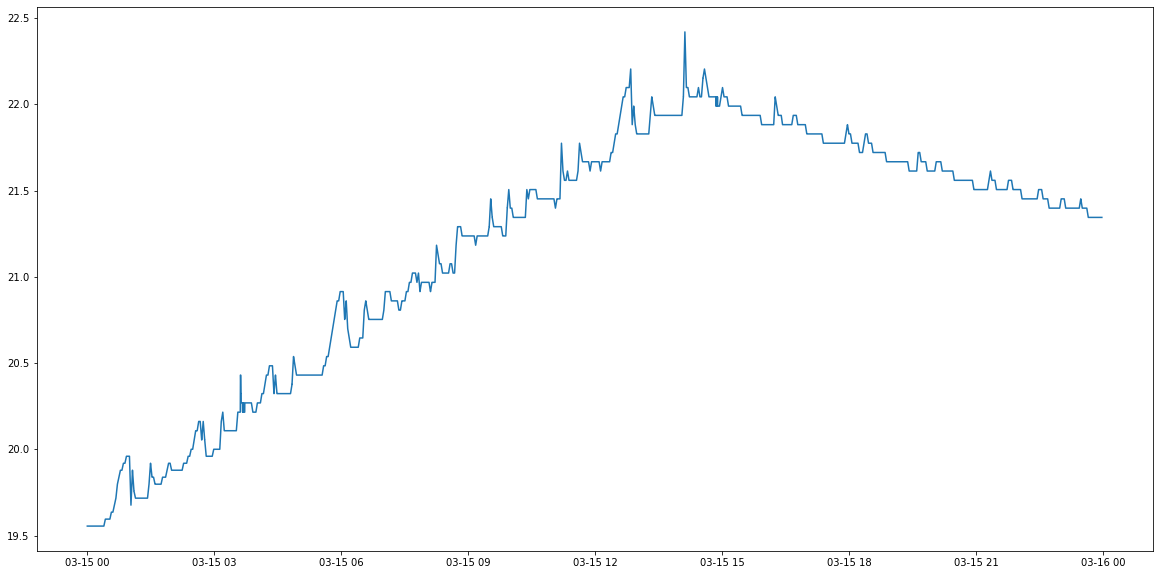

In [145]:
data_d1_m3 = data_sp.loc[(data_sp['day']==15) & (data_sp['month']==3)]
# data_d1_m3
plt.figure(figsize=(20,10))
plt.plot(data_d1_m3['StandardTime'],data_d1_m3['value'])

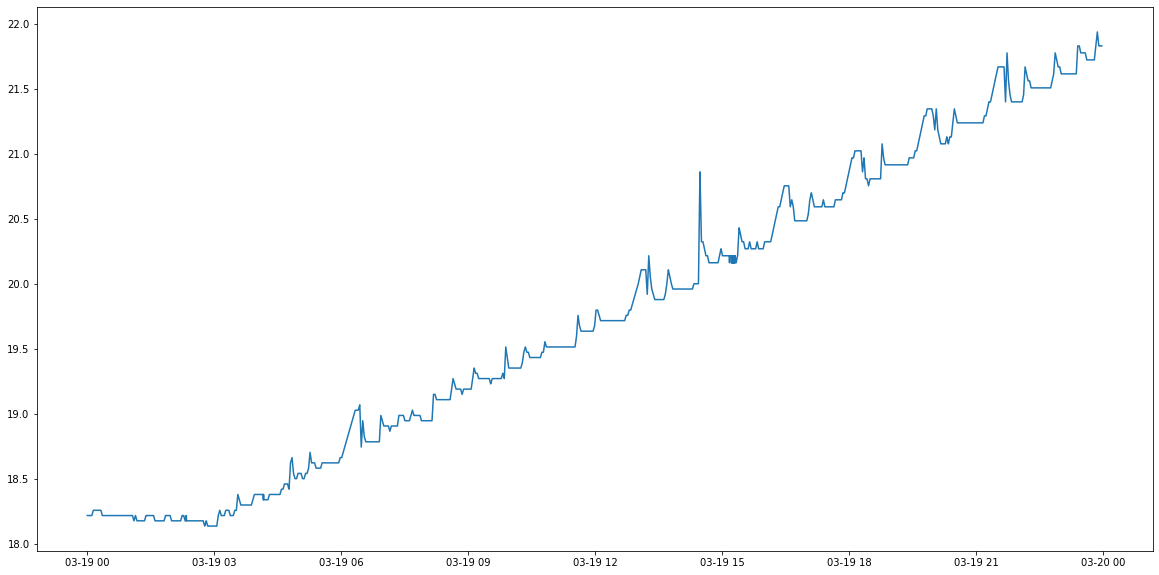

In [147]:
data_d1_m3 = data_sp.loc[(data_sp['day']==19) & (data_sp['month']==3)]
# data_d1_m3
plt.figure(figsize=(20,10))
plt.plot(data_d1_m3['StandardTime'],data_d1_m3['value'])

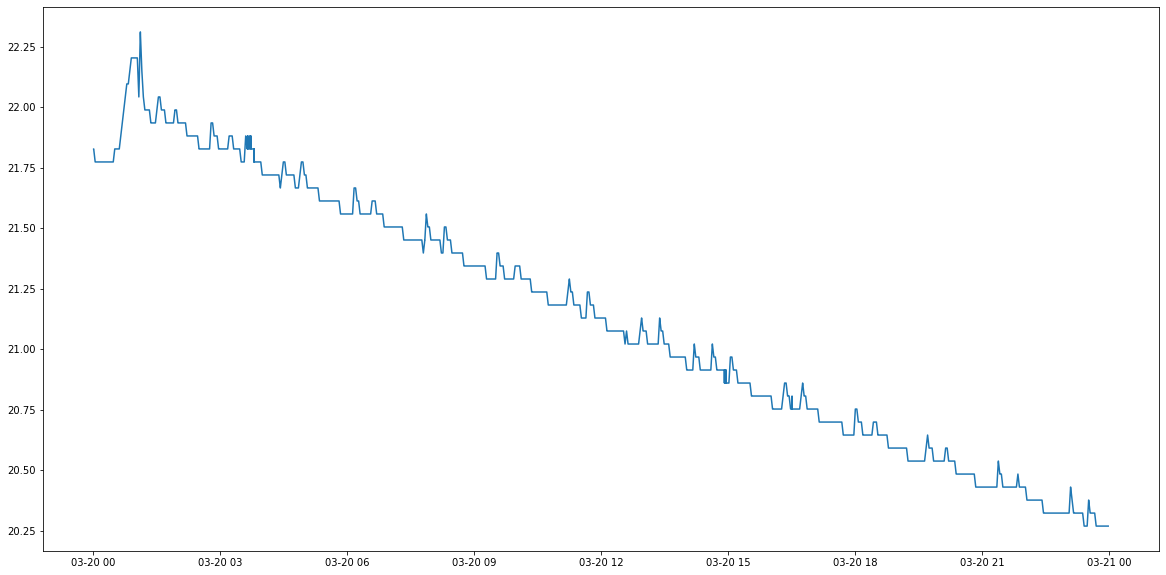

In [148]:
data_d1_m3 = data_sp.loc[(data_sp['day']==20) & (data_sp['month']==3)]
# data_d1_m3
plt.figure(figsize=(20,10))
plt.plot(data_d1_m3['StandardTime'],data_d1_m3['value'])